In [1]:
from itertools import islice
import numpy as np
from numpy.random import RandomState
from numpy.polynomial import Polynomial
from matplotlib.pyplot import plot
from ipywidgets import interact, IntSlider

In [2]:
from longstaff_schwartz.stochastic_process import GeometricBrownianMotion

In [3]:
rnd = RandomState(seed=1234)

In [4]:
t = np.linspace(0, 3, 4)
n = 8
r = 0.06

In [5]:
X = np.array([
    [1.00, 1.09, 1.08, 1.34],
    [1.00, 1.16, 1.26, 1.54],
    [1.00, 1.22, 1.07, 1.03],
    [1.00, 0.93, 0.97, 0.92],
    [1.00, 1.11, 1.56, 1.52],
    [1.00, 0.76, 0.77, 0.90],
    [1.00, 0.92, 0.84, 1.01],
    [1.00, 0.88, 1.22, 1.34]]).T
X.shape

(4, 8)

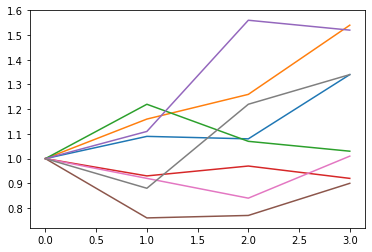

In [6]:
plot(t, X);

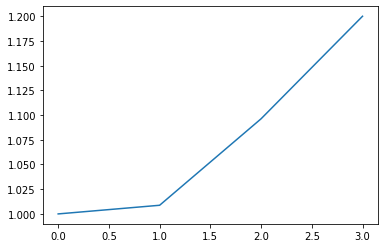

In [7]:
plot(t, X.mean(axis=1));

In [8]:
def exercise_value(s):
    return np.maximum(s - 1.1, 0)

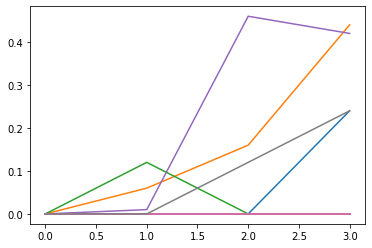

In [9]:
plot(t, exercise_value(X));

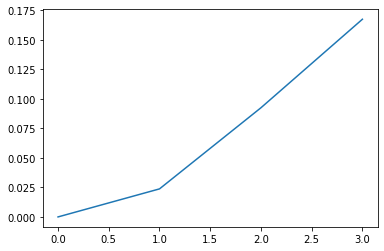

In [10]:
plot(t, exercise_value(X).mean(axis=1));

In [11]:
p = Polynomial([1, 1, 1, 1])
p

Polynomial([1., 1., 1., 1.], domain=[-1,  1], window=[-1,  1])

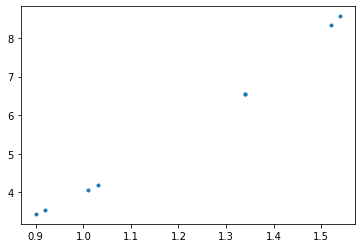

In [12]:
x = X[-1, :]
plot(x, p(x), '.');

In [13]:
def fit(x, y):
    return Polynomial.fit(x, y, 3)

In [14]:
p = fit(x, exercise_value(x))
p

Polynomial([ 0.12321384,  0.2833034 ,  0.09763572, -0.06498634], domain=[0.9 , 1.54], window=[-1.,  1.])

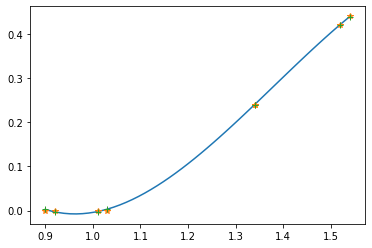

In [15]:
_x = np.linspace(np.min(x), np.max(x))
plot(_x, p(_x));
plot(x, exercise_value(x), '*');
plot(x, p(x), '+');

In [16]:
def backward_regression(fit, exercise_value, X, r):
    total = exercise_value(X[-1, :])
    for i in reversed(range(1, X.shape[0] - 1)):
        x = X[i, :]
        itm = exercise_value(x) > 0
        fitted = fit(x[itm], total[itm] * np.exp(-r))
        exercise = exercise_value(x)
        continuation = fitted(x)
        total = np.maximum(exercise, continuation)
        yield total, x, fitted, continuation, exercise

In [17]:
bw_regr_steps = list(backward_regression(fit, exercise_value, X, r))

/home/luphord/root/miniconda3/envs/ls/lib/python3.7/site-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [18]:
for total, x, fitted, continuation, exercise in backward_regression(fit, exercise_value, X, r):
    print(fitted)

poly([ 0.46604152 -0.24259236 -0.15525923  0.32735117])
poly([ 0.37869163 -0.14119887 -0.16208579 -0.07540697])


In [19]:
assert np.average(total) >= np.average(exercise_value(X[-1, :]))
print(np.average(total))
print(np.average(exercise_value(X[-1, :])))

4.9693028574961415
0.16749999999999998
